# Remember, sequences are reversed!

In [96]:
%matplotlib inline
import torch
import numpy as np
import tensorflow as tf
from abc import ABC, abstractmethod
from scripts.stlcg import *
from scripts.stlviz import make_stl_graph
from scripts.util import *

import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
x_np = np.array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1], dtype=np.float32).reshape([1, 10, 1])

In [67]:
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(4.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(1.0, dtype=torch.float, requires_grad=True)

In [76]:
GThan = GreaterThan(name="x", c=c)
print(GThan)
LThan = LessThan(name="w", c=d)
print(LThan)
Eq = Equal(name="x", c=d)
print(Eq)
An = And(subformula1=LThan, subformula2=GThan)
print(Eq)
Alw = Always(subformula=An)
print(Alw)
Ev = Eventually(subformula=An)
print(Ev)

x >= 4.0
w <= 1.0
x = 1.0
x = 1.0
◻ [0, inf]( (w <= 1.0) ∧ (x >= 4.0) )
♢ [0, inf]( (w <= 1.0) ∧ (x >= 4.0) )


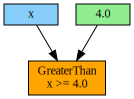

In [73]:
make_stl_graph(GThan)

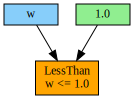

In [74]:
make_stl_graph(LThan)

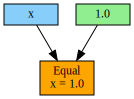

In [75]:
make_stl_graph(Eq)

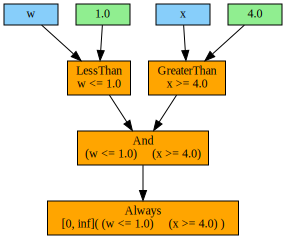

In [78]:
make_stl_graph(Alw)

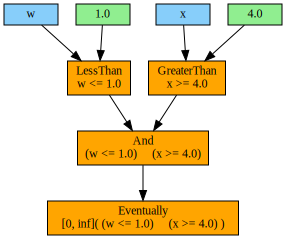

In [79]:
make_stl_graph(Ev)

# Testing grad functionality

In [175]:
device = torch.device("cpu")
learning_rate = 0.1
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(2.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(-3.0, dtype=torch.float, requires_grad=True)

subformula1 = LessThan(name="x", c=d)
GThan = GreaterThan(name="w", c=c)
subformula2=Always(subformula=GThan, interval=[2,4])

model = Or(subformula1=subformula1, subformula2=subformula2)

optimizer = torch.optim.Adam([c, d], lr=learning_rate)
scale = 10

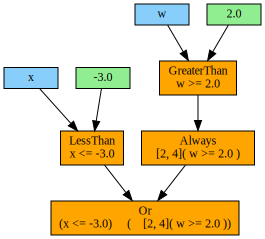

In [176]:
make_stl_graph(model)

In [177]:
for i in range(100):
    trace1 = model.subformula1(x)
    trace2 = model.subformula2(model.subformula2.subformula(w), scale=scale)
    loss = (model.robustness(trace1, trace2, scale=scale)**2).mean()
    print("iteration: ", i, " ----  d =", d.detach().numpy(), " ----  c =", c.detach().numpy(), "  ----  loss =", loss.detach().numpy())
    loss.backward()
    with torch.no_grad():
        d -= learning_rate * d.grad
        c -= learning_rate * c.grad
        d.grad.zero_()
        c.grad.zero_()

iteration:  0  ----  d = -3.0  ----  c = 2.0   ----  loss = 1.0000908
iteration:  1  ----  d = -3.0  ----  c = 2.200009   ----  loss = 0.640058
iteration:  2  ----  d = -3.0  ----  c = 2.3600163   ----  loss = 0.40963712
iteration:  3  ----  d = -3.0  ----  c = 2.488022   ----  loss = 0.2621679
iteration:  4  ----  d = -3.0  ----  c = 2.5904267   ----  loss = 0.16778748
iteration:  5  ----  d = -3.0  ----  c = 2.6723504   ----  loss = 0.10738402
iteration:  6  ----  d = -3.0  ----  c = 2.7378893   ----  loss = 0.06872584
iteration:  7  ----  d = -3.0  ----  c = 2.7903204   ----  loss = 0.043984577
iteration:  8  ----  d = -3.0  ----  c = 2.8322654   ----  loss = 0.028150138
iteration:  9  ----  d = -3.0  ----  c = 2.8658214   ----  loss = 0.018016094
iteration:  10  ----  d = -3.0  ----  c = 2.892666   ----  loss = 0.011530315
iteration:  11  ----  d = -3.0  ----  c = 2.914142   ----  loss = 0.007379413
iteration:  12  ----  d = -3.0  ----  c = 2.9313226   ----  loss = 0.004722826
iter

In [129]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(7.0, requires_grad=True)

In [134]:
mask = bump(torch.arange(0, 10, 1, dtype=torch.float32), a, b, 3)
seg = x[:,torch.round(mask).type('torch.ByteTensor'),:]

In [135]:
loss

tensor(9.)

In [136]:
loss = torch.max(seg)**2

In [132]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [116]:
torch.round(mask).type('torch.ByteTensor')

tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=torch.uint8)

In [95]:
torch.ByteTensor([1, 0, 1, 0.7])

tensor([1, 0, 1, 0], dtype=torch.uint8)

In [102]:
?torch.gather

In [108]:
x.select(1, torch.round(mask))

TypeError: select(): argument 'index' (position 2) must be int, not Tensor

In [117]:
x[:,torch.round(mask).type('torch.ByteTensor'),:]

tensor([[[3.],
         [2.],
         [1.],
         [0.],
         [1.],
         [2.]]])

In [118]:
x

tensor([[[5.],
         [4.],
         [3.],
         [2.],
         [1.],
         [0.],
         [1.],
         [2.],
         [3.],
         [4.]]])